In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Read Data

In [6]:
uni1=pd.read_excel('uni_eto12_1.xlsx')
uni2=pd.read_excel('uni_eto12_2.xlsx')
uni3=pd.read_excel('uni_eto12_3.xlsx')
uni4=pd.read_excel('uni_eto12_4.xlsx')
uni5=pd.read_excel('uni_eto12_5.xlsx')


In [7]:
uni1=uni1.iloc[:,0:5]
uni2=uni2.iloc[:,0:5]
uni3=uni3.iloc[:,0:5]
uni4=uni4.iloc[:,0:5]
uni5=uni5.iloc[:,0:5]

In [8]:
uni1.columns=['time','eto11','sig11','eto12','sig12']
uni1.head()

,time,eto11,sig11,eto12,sig12
0,0,0,0,0.0000,0.000000
1,1,0,0,0.0012,66.029532
2,2,0,0,0.0024,131.336576
3,3,0,0,0.0036,165.508380
4,4,0,0,0.0048,177.850277


In [9]:
uni2.columns=['time','eto11','sig11','eto12','sig12']
uni2.head()

,time,eto11,sig11,eto12,sig12
0,0,0,0,0.0000,0.000000
1,1,0,0,0.0013,71.531974
2,2,0,0,0.0026,140.953427
3,3,0,0,0.0039,169.902220
4,4,0,0,0.0052,181.679066


In [10]:
uni3.columns=['time','eto11','sig11','eto12','sig12']
uni3.head()

,time,eto11,sig11,eto12,sig12
0,0,0,0,0.0000,0.000000
1,1,0,0,0.0017,93.539910
2,2,0,0,0.0034,165.033448
3,3,0,0,0.0051,183.456510
4,4,0,0,0.0068,193.956860


In [11]:
uni4.columns=['time','eto11','sig11','eto12','sig12']
uni4.head()

,time,eto11,sig11,eto12,sig12
0,0,0,0,0.000,0.000000
1,1,0,0,0.002,110.025169
2,2,0,0,0.004,174.664521
3,3,0,0,0.006,191.219651
4,4,0,0,0.008,200.849503


In [14]:
uni5.columns=['time','eto11','sig11','eto12','sig12']
uni5.head()

,time,eto11,sig11,eto12,sig12
0,0,0,0,0.0000,0.000000
1,1,0,0,0.0022,120.951230
2,2,0,0,0.0044,179.763608
3,3,0,0,0.0066,195.611665
4,4,0,0,0.0088,204.680645


In [16]:
print(len(uni1),len(uni2),len(uni3),len(uni4),len(uni5))


8250 7249 5427 4721 4350


### plot sig12 with time

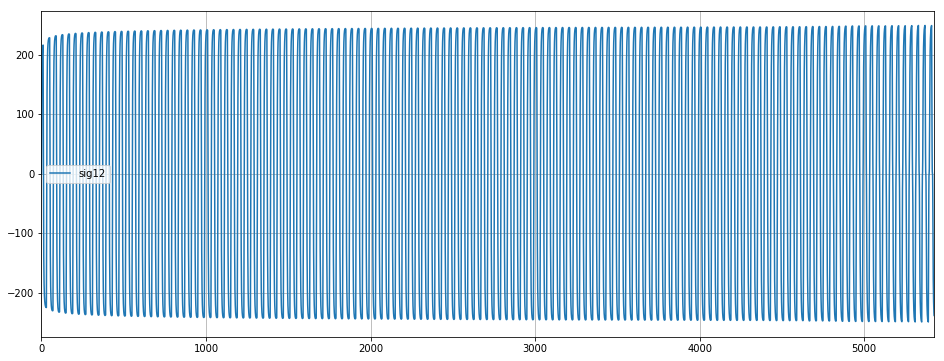

In [17]:
f,ax=plt.subplots(figsize=(16,6))
uni3[['sig12']].plot(ax=ax,grid=True)

### plot  eto12 with time

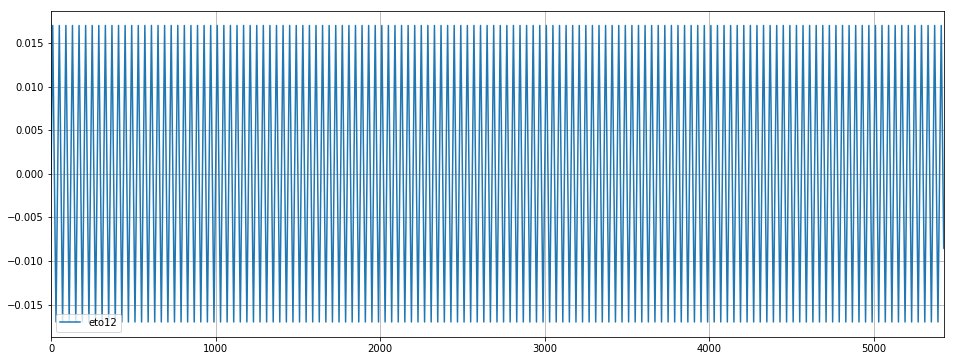

In [18]:
f,ax=plt.subplots(figsize=(16,6))
uni3[['eto12']].plot(ax=ax,grid=True)

# LSTM

In [19]:
 def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN valuestype(new_uni4.iloc[1,2])
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [20]:
data=pd.concat([uni1,uni2,uni3,uni4,uni5])

In [21]:
print(len(data))
data.head(5)

29997


,time,eto11,sig11,eto12,sig12
0,0,0,0,0.0000,0.000000
1,1,0,0,0.0012,66.029532
2,2,0,0,0.0024,131.336576
3,3,0,0,0.0036,165.508380
4,4,0,0,0.0048,177.850277


In [22]:
data = series_to_supervised(data.iloc[:,3:].values, 1, 1)
print(data.head())

   var1(t-1)   var2(t-1)  var1(t)     var2(t)
1     0.0000    0.000000   0.0012   66.029532
2     0.0012   66.029532   0.0024  131.336576
3     0.0024  131.336576   0.0036  165.508380
4     0.0036  165.508380   0.0048  177.850277
5     0.0048  177.850277   0.0060  186.151289


In [23]:
data.columns=['eto12(t-1)','sig12(t-1)','eto12(t)','sig12(t)']
data.head()

,eto12(t-1),sig12(t-1),eto12(t),sig12(t)
1,0.0000,0.000000,0.0012,66.029532
2,0.0012,66.029532,0.0024,131.336576
3,0.0024,131.336576,0.0036,165.508380
4,0.0036,165.508380,0.0048,177.850277
5,0.0048,177.850277,0.0060,186.151289


### Prepare Data for Lstm

In [24]:
n_mins=3
n_features=1
values = data.values
n_train_mins=int(len(data)*0.8)
train = values[:n_train_mins, :]
test = values[n_train_mins:, :]
n_obs = n_mins * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X,  test_y =test[:, :n_obs], test[:,-1]
train_X = train_X.reshape((train_X.shape[0], n_mins, n_features))
test_X = test_X.reshape((test_X.shape[0], n_mins, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(23996, 3, 1) (23996,) (6000, 3, 1) (6000,)


In [25]:
train_y=train_y.reshape(-1,1)
test_y=test_y.reshape(-1,1)

print(train_y.shape)

(23996, 1)


## Design Model

In [66]:
from keras.models import Sequential 
from keras.layers import Dense,LSTM,LeakyReLU,Dropout

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 45,901
Trainable params: 45,901
Non-trainable params: 0
_________________________________________________________________


## Train model

In [67]:

# define parameters
verbose, epochs, batch_size = 1, 50, 128
# TRain  network
history=model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size,validation_split=0.2,verbose=verbose,shuffle=False)


Train on 19196 samples, validate on 4800 samples
Epoch 1/50
19196/19196 [==============================] - 3s 164us/step - loss: 4466.2312 - val_loss: 1915.1861
Epoch 2/50
19196/19196 [==============================] - 1s 76us/step - loss: 1653.7839 - val_loss: 1911.1886
Epoch 3/50
19196/19196 [==============================] - 2s 79us/step - loss: 1583.2288 - val_loss: 1891.2879
Epoch 4/50
19196/19196 [==============================] - 1s 76us/step - loss: 1569.2249 - val_loss: 1888.1488
Epoch 5/50
19196/19196 [==============================] - 1s 77us/step - loss: 1564.5668 - val_loss: 1877.7563
Epoch 6/50
19196/19196 [==============================] - 1s 76us/step - loss: 1540.3259 - val_loss: 1852.0072
Epoch 7/50
19196/19196 [==============================] - 1s 77us/step - loss: 1527.4516 - val_loss: 1790.9855
Epoch 8/50
19196/19196 [==============================] - 1s 77us/step - loss: 1470.0758 - val_loss: 1677.8525
Epoch 9/50
19196/19196 [==============================] - 2s 7

## plot train an validation loss

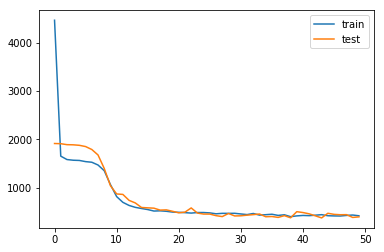

In [68]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [31]:
#model.save('Uni_axial_eto12_Behavior_sigma.h5')

In [73]:
from keras.models import load_model
model_loaded=load_model('Uni_axial_eto12_Behavior_sigma.h5')

## predict test data

In [76]:
y_pred=model.predict(test_X)

In [77]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print('Test RMSE : %.3f' % rmse)

Test RMSE : 26.117


## Plot Actual Vs Prediction

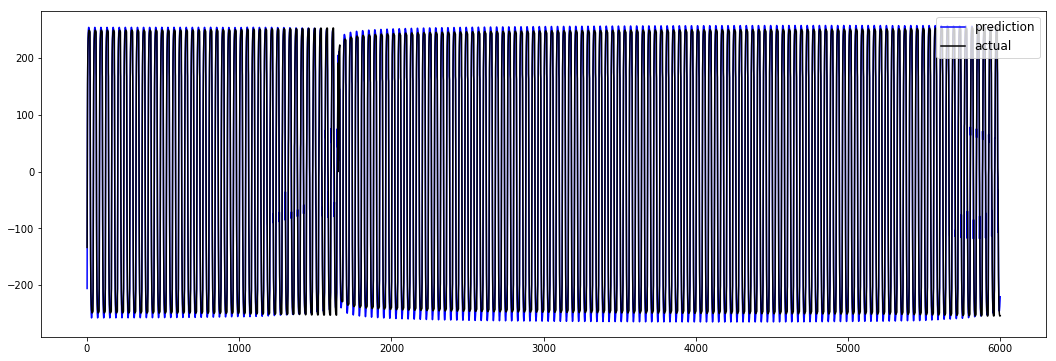

In [78]:
# plot
plt.figure(figsize=(18,6))
plt.plot([x for x in range(1,y_pred.shape[0]+1)], y_pred, linestyle='-', color='blue', label='prediction')
plt.plot([x for x in range(1,test_y.shape[0]+1)], test_y, linestyle='-', color='black', label='actual')
plt.legend(loc=1, prop={'size': 12})
plt.show()



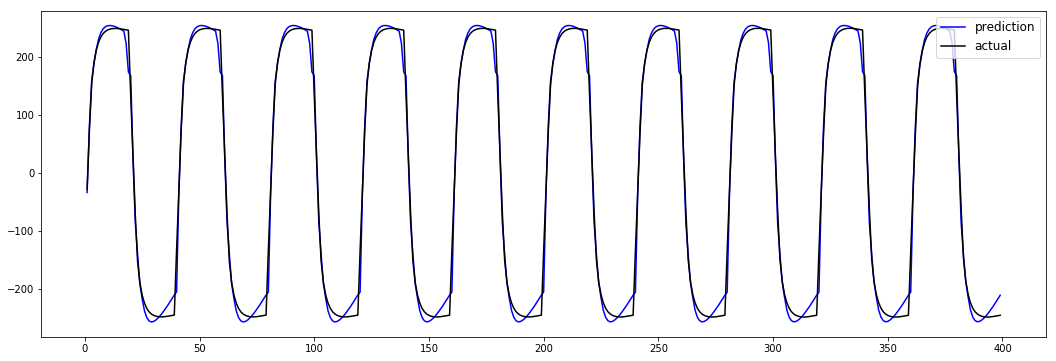

In [79]:
# plot
plt.figure(figsize=(18,6))
plt.plot([x for x in range(1,400)], y_pred[1:400], linestyle='-', color='blue', label='prediction')
plt.plot([x for x in range(1,400)], test_y[1:400], linestyle='-', color='black', label='actual')
plt.legend(loc=1, prop={'size': 12})
plt.show()



# Analysis to extract sigmamax from predicted behavior

In [80]:
prediction=pd.DataFrame(data=y_pred,columns=['pred'])
prediction.iloc[:,0].head()

0   -205.515152
1    -34.248611
2     80.132744
3    158.205704
4    188.111984
Name: pred, dtype: float32

In [87]:
sigmax=pd.DataFrame(columns=['no_of_c','sig_max_pred'])
count=0

for i in range(1,len(prediction)-1):
  if prediction.iloc[i,0]>prediction.iloc[i+1,0] and prediction.iloc[i,0] > prediction.iloc[i-1,0] and prediction.iloc[i,0] > 100 :
    count+=1
    sigmax.loc[i,'sig_max_pred']=prediction.iloc[i,0]
    sigmax.loc[i,'no_of_c']=count
 
    


In [88]:
sigmax.tail()

,no_of_c,sig_max_pred
5813,147,255.474
5853,148,255.089
5894,149,254.442
5934,150,253.815
5975,151,252.499


In [89]:
print(len(sigmax))

151


In [90]:
y_pred= sigmax['sig_max_pred'].values

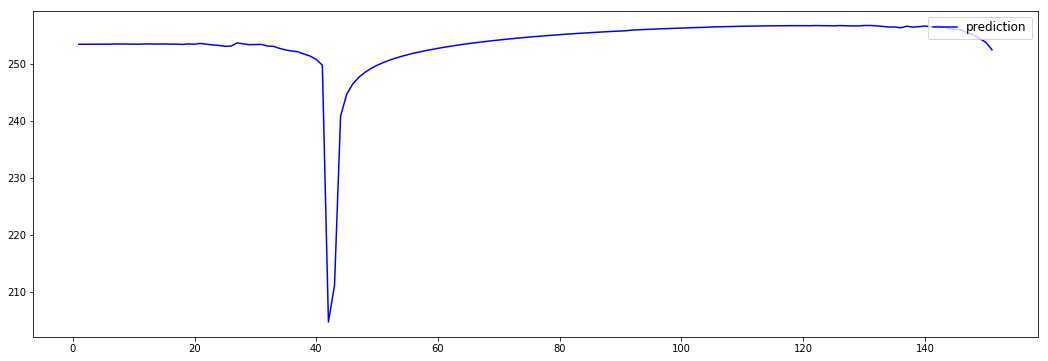

In [91]:
# plot
plt.figure(figsize=(18,6))
plt.plot([x for x in range(1,y_pred.shape[0]+1)],y_pred, linestyle='-', color='blue', label='prediction')
plt.legend(loc=1, prop={'size': 12})
plt.show()

